# Scipy

## Special functions

### Bessel functions of real order(jv, jn_zeros)

Bessel functions are a family of solutions to Bessel’s differential equation with real or complex order alpha:

$$x^{2}\frac{\mathrm{d^2}y }{\mathrm{d} x^2} + x\frac{\mathrm{d}y }{\mathrm{d} x} + \left ( x^2 - \alpha^2 \right )y = 0 $$

In [1]:
from scipy import special
import numpy as np

def drumhead_height(n, k, distance, angle, t):
   kth_zero = special.jn_zeros(n, k)[-1]
   return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)
theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

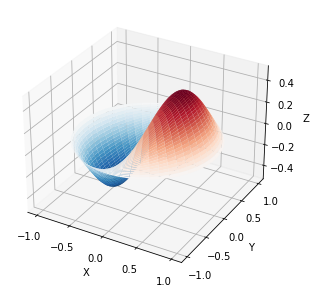

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel('Z')
plt.show()

## Integration (scipy.integrate)

In [3]:
import scipy.integrate as integrate
help(integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       quad_vec      -- General purpose integration of vector-valued functions
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose N-D integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       quad_explain  -- Print information for use of quad
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       IntegrationWarning -- Warning on i

In [4]:
import scipy.integrate as integrate
import scipy.special as special
result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)
result

(1.1178179380783244, 7.866317216380707e-09)

In [5]:
from numpy import sqrt, sin, cos, pi
I = sqrt(2/pi)*(18.0/27*sqrt(2)*cos(4.5) - 4.0/27*sqrt(2)*sin(4.5) +
                sqrt(2*pi) * special.fresnel(3/sqrt(pi))[0])
I

1.117817938088701

In [6]:
print(abs(result[0]-I))

1.0376588477356563e-11


In [7]:
from scipy.integrate import quad
def integrand(x, a, b):
    return a*x**2 + b

a = 2
b = 1
I = quad(integrand, 0, 1, args=(a,b))
I

(1.6666666666666667, 1.8503717077085944e-14)

In [8]:
from scipy.integrate import quad
def integrand(t, n, x):
    return np.exp(-x*t) / t**n

In [9]:
def expint(n, x):
    return quad(integrand, 1, np.inf, args=(n, x))[0]

In [10]:
vec_expint = np.vectorize(expint)
vec_expint(3, np.arange(1.0, 4.0, 0.5))

import scipy.special as special
special.expn(3, np.arange(1.0,4.0,0.5))

array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

In [11]:
result = quad(lambda x: expint(3, x), 0, np.inf)
print(result)

(0.3333333333366853, 1.3274031145043084e-09)


In [12]:
I3 = 1.0/3.0
print(I3)

0.3333333333333333


In [13]:
print(I3 - result[0])

-3.3519853559482726e-12
